# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hasee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [6]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

In [7]:
bitcoin_articles

{'status': 'ok',
 'totalResults': 7454,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Khari Johnson',
   'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
   'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
   'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
   'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
   'publishedAt': '2021-07-19T11:00:00Z',
   'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'Kaseya ransomware attackers deman

In [8]:
analyzer.polarity_scores("By Reuters Staff")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [10]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,2021-08-03,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,0.000,1.000
4,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.019345,0.058500,0.059750,0.881750
std,0.484055,0.058633,0.090311,0.101771
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.405525,0.000000,0.000000,0.836000
50%,0.000000,0.056000,0.000000,0.906000
75%,0.315000,0.092500,0.088250,0.940000
max,0.726400,0.178000,0.287000,1.000000


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.227625,0.069250,0.015500,0.915250
std,0.329196,0.074979,0.028127,0.081102
min,-0.340000,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.125000,0.037500,0.000000,0.926500
75%,0.528675,0.149250,0.010250,1.000000
max,0.771700,0.194000,0.072000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ethereum

Q: Which coin had the highest compound score?

A: ethereum

Q. Which coin had the highest positive score?

A: ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] =  bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."


In [17]:
# Create a new tokens column for Ethereum
eth_df["tokens"] =  eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
3,2021-08-03,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,0.000,1.000,"[representations, cryptocurrencies, bitcoin, e..."
4,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895,"[cryptocurrencies, spiked, monday, amazon, lis..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
tokenizer(bitcoin_df.text.str.cat())

['like',
 'dogecoin',
 'devotee',
 'mayor',
 'reno',
 'leader',
 'el',
 'salvador',
 'aldo',
 'baoicchi',
 'convinced',
 'cryptocurrency',
 'future',
 'ceo',
 'founder',
 'canadian',
 'scooter',
 'maker',
 'daymak',
 'belief',
 'charsfiled',
 'underthe',
 'supply',
 'chain',
 'attack',
 'ha',
 'reached',
 'thousand',
 'organizationsillustration',
 'alex',
 'castro',
 'vergethree',
 'day',
 'ransomware',
 'attacker',
 'started',
 'holiday',
 'weekend',
 'comprom',
 'charsimage',
 'copyrightgetty',
 'imagesthe',
 'gang',
 'behind',
 'colossal',
 'ransomware',
 'attack',
 'ha',
 'demanded',
 'paid',
 'bitcoin',
 'return',
 'universal',
 'decryptor',
 'say',
 'unlock',
 'file',
 'charsto',
 'get',
 'roundup',
 'techcrunchs',
 'biggest',
 'important',
 'story',
 'delivered',
 'inbox',
 'every',
 'day',
 'pm',
 'pdt',
 'subscribe',
 'herehello',
 'welcome',
 'daily',
 'crunch',
 'july',
 'charswhile',
 'retail',
 'investor',
 'grew',
 'comfortable',
 'buying',
 'cryptocurrencies',
 'like',
 

In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram_counts = Counter(ngrams(tokenizer(eth_df.text.str.cat()), n=2))
print(dict(ethereum_ngram_counts))

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'charsblockchain'): 1, ('charsblockchain', 'infrastructure'): 1, ('infrastructure', 'startup'): 1, ('startup', 'heating'): 1, ('heating', 'industry'): 1, ('industry', 'fervor'): 1, ('fervor', 'brings'): 1, ('brings', 'developer'): 1, ('developer', 'user'): 1, ('user', 'space'): 1, ('space', 'still'): 1, ('still', 'feel'): 1, ('feel', 'extremely'): 1, ('extremely', 'young'): 1, ('young', 'despite'): 1, ('despite', 'heavy'): 1, ('heavy', 'institutional'): 1, ('institutional', 'embrace'): 1, ('embrace', 'crypto'): 1, ('crypto', 'charswhile'): 1, ('charswh

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_count( tokenizer(bitcoin_df.text.str.cat()), N = 10)

[('bitcoin', 12),
 ('attack', 7),
 ('ha', 6),
 ('reuters', 6),
 ('july', 5),
 ('world', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5),
 ('seen', 4)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
token_count( tokenizer(eth_df.text.str.cat()), N = 10)

[('ethereum', 15),
 ('bitcoin', 6),
 ('cryptocurrency', 6),
 ('network', 5),
 ('platform', 4),
 ('cryptocurrencies', 4),
 ('world', 4),
 ('ha', 4),
 ('charsrepresentations', 4),
 ('illustration', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

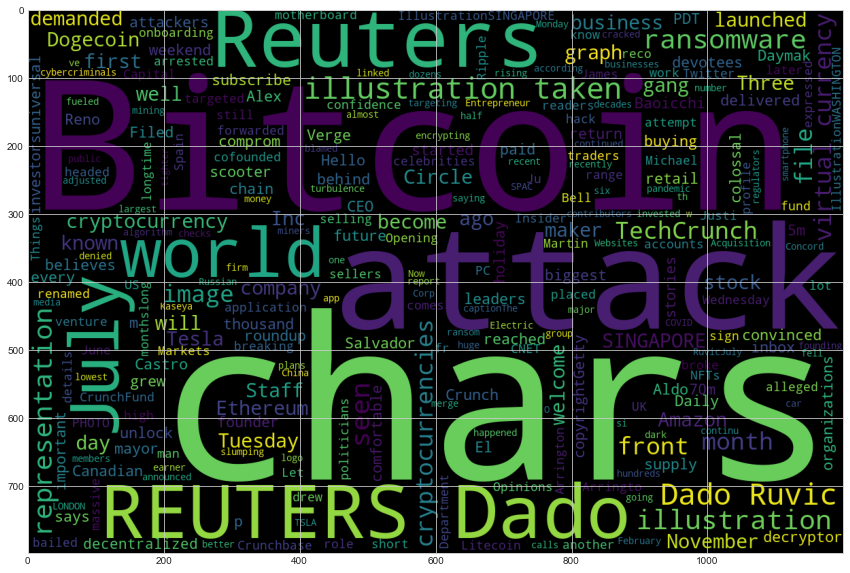

In [27]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=1200, height=800, max_words=500).generate(bitcoin_df.text.str.cat())
plt.imshow(wc)

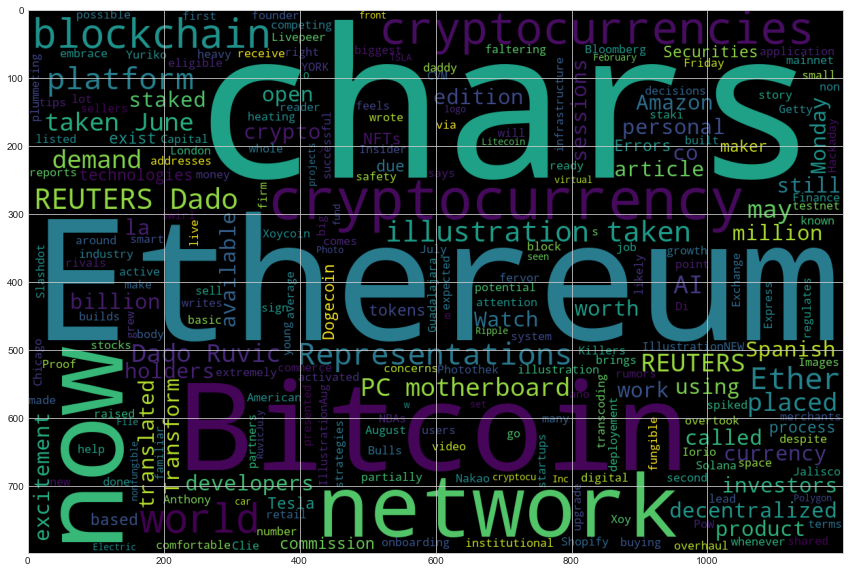

In [28]:
# Generate the Ethereum word cloud
wc = WordCloud(width=1200, height=800, max_words=500).generate(eth_df.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_df.text.str.cat()

In [33]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [34]:
# Render the visualization
displacy.render(doc, style='ent')

In [35]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
chars]James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuter

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
eth_text = eth_df.text.str.cat()

In [37]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [38]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [39]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Ethereum
 ORG
Yuriko Nakao PERSON
Friday DATE
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
Polygon ORG
$100 million MONEY
June 29, 2021 DATE
REUTERS O

---